# Work with Multiple Time Series

Di bidang Ilmu Data, adalah umum untuk terlibat dalam proyek-proyek di mana ada beberapa time series perlu dipelajari secara bersamaan. Dalam bab ini, kami akan menunjukkan kepada Anda cara memetakan beberapa time series sekaligus, dan bagaimana menemukan dan menggambarkan hubungan antara beberapa time series.

## Working with more than one time series

### Load multiple time series

Baik itu selama proyek pribadi atau pekerjaan sehari-hari Anda sebagai Data Scientist, kemungkinan Anda akan menghadapi situasi yang memerlukan analisis dan visualisasi beberapa rangkaian waktu sekaligus.

Asalkan data untuk setiap time series disimpan dalam kolom file yang berbeda, pandas membuatnya mudah untuk bekerja dengan banyak time series. Dalam latihan berikut, Anda akan bekerja dengan dataset time series baru yang berisi jumlah berbagai jenis daging yang diproduksi di AS antara 1944 dan 2012.

In [3]:
import pandas as pd

# Read in meat DataFrame
meat = pd.read_csv('datasets/ch4_meat.csv')

# Review the first five lines of the meat DataFrame
display(meat.head(5))

# Convert the date column to a datestamp type
meat['date'] = pd.to_datetime(meat['date'])

# Set the date column as the index of your DataFrame meat
meat = meat.set_index('date')

# Print the summary statistics of the DataFrame
display(meat.describe())

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
count,827.000000,827.000000,827.000000,827.000000,635.000000,143.000000,635.000000
mean,1683.463362,54.198549,1211.683797,38.360701,1516.582520,43.033566,292.814646
std,501.698480,39.062804,371.311802,19.624340,963.012101,3.867141,162.482638
min,366.000000,8.800000,124.000000,10.900000,250.900000,32.300000,12.400000
25%,1231.500000,24.000000,934.500000,23.000000,636.350000,40.200000,154.150000
50%,1853.000000,40.000000,1156.000000,31.000000,1211.300000,43.400000,278.300000
75%,2070.000000,79.000000,1466.000000,55.000000,2426.650000,45.650000,449.150000
max,2512.000000,215.000000,2210.400000,109.000000,3383.800000,51.100000,585.100000


### Visualize multiple time series

Jika ada beberapa time series dalam satu DataFrame, Anda masih bisa menggunakan metode `.plot()` untuk memplot line chart semua time series. Cara lain yang menarik untuk memplot ini adalah dengan menggunakan area chart. Area chart umumnya digunakan ketika berhadapan dengan banyak time series, dan dapat digunakan untuk menampilkan total kumulasi.

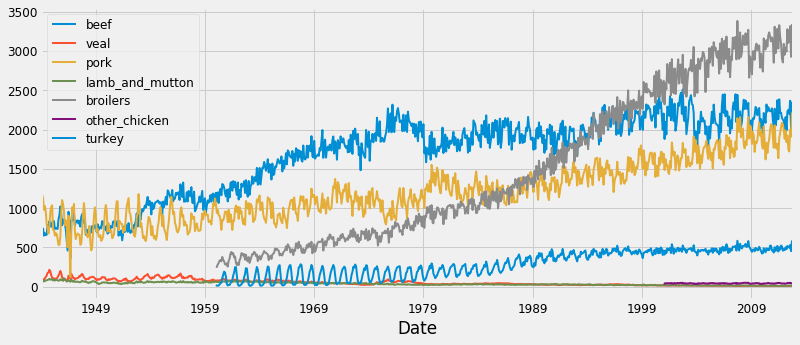

In [17]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Plot time series dataset
ax = meat.plot(figsize=(12, 5), linewidth=2, fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=12)

# Show plot
plt.show()

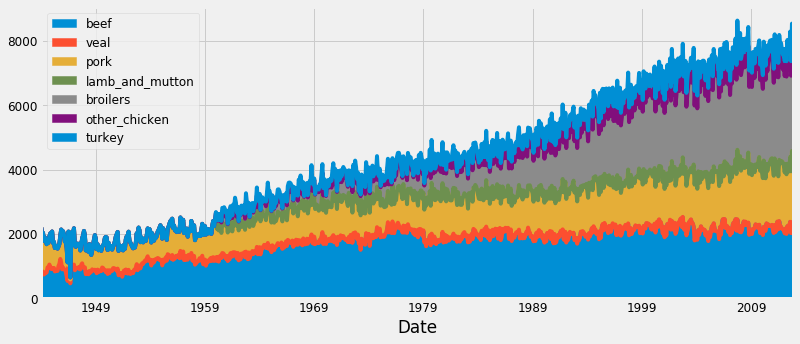

In [16]:
# Plot an area chart
ax = meat.plot.area(figsize=(12, 5), fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=12)

# Show plot
plt.show()

## Plot multiple time series

### Define the color palette of your plots

Saat memvisualisasikan beberapa time series, mungkin sulit untuk membedakan antara berbagai warna dalam skema warna default.

Untuk memperbaiki ini, Anda dapat menentukan setiap warna secara manual, tetapi ini mungkin memakan waktu. Untungnya, dimungkinkan untuk memanfaatkan argumen `colormap` ke `.plot()` untuk secara otomatis menetapkan palet warna tertentu dengan kontras yang berbeda-beda. Anda dapat memberikan `matplotlib colormap` sebagai input ke parameter ini, atau memberikan salah satu string default yang tersedia di fungsi `colormap()` yang tersedia di matplotlib (semuanya tersedia [di sini](http://matplotlib.org/examples/color/colormaps_reference.html)).

Misalnya, Anda dapat menentukan colormap `'viridis'` menggunakan perintah berikut:

```python
df.plot(colormap='viridis')
```

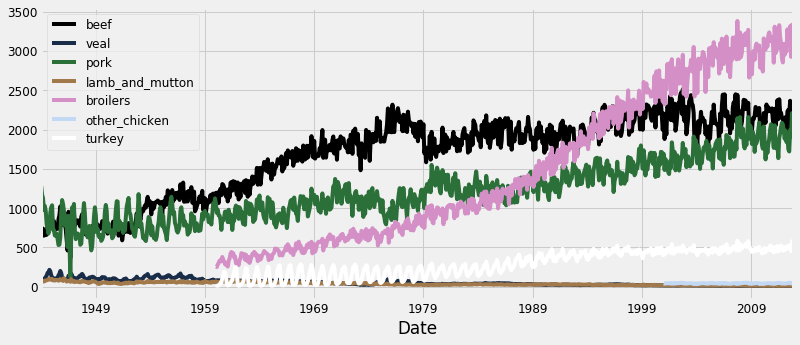

In [21]:
# Plot time series dataset using the cubehelix color palette
ax = meat.plot(colormap='cubehelix', figsize=(12, 5), fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=12)

# Show plot
plt.show()

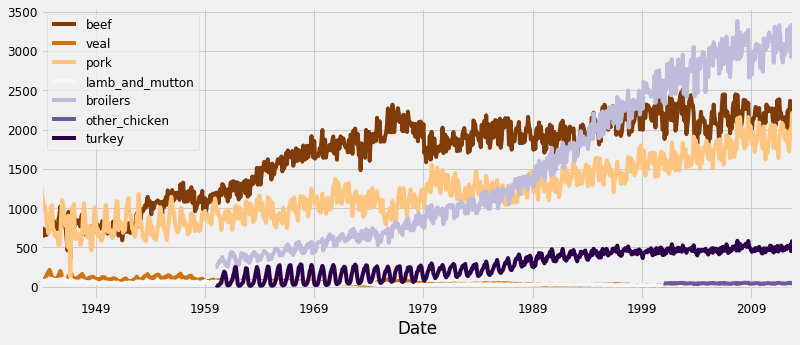

In [23]:
# Plot time series dataset using the cubehelix color palette
ax = meat.plot(colormap='PuOr', figsize=(12, 5), fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=12)

# Show plot
plt.show()

**Catatan** : Pastikan untuk selalu mempertimbangkan seberapa mudah plot Anda dibaca sebelum membagikannya.

### Add summary statistics to your time series plot

Dimungkinkan untuk memvisualisasikan plot time series dan ringkasan numerik pada satu grafik tunggal dengan menggunakan API `pandas` untuk `matplotlib` bersama dengan metode `table`.

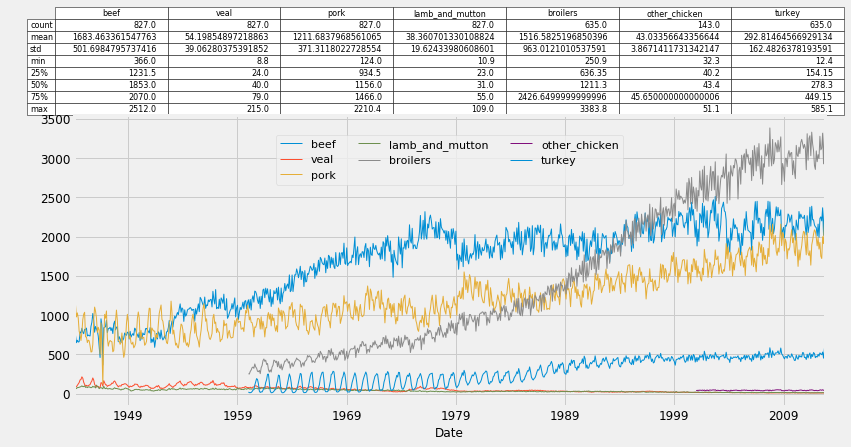

In [31]:
# Plot the meat data
ax = meat.plot(fontsize = 12, linewidth = 1, figsize=(12, 5))

# Add x-axis labels
ax.set_xlabel('Date', fontsize = 12)

# Compute summary statistics of the df DataFrame
meat_mean = meat.describe()

# Add summary table information to the plot
ax.table(cellText = meat_mean.values,
         colWidths = [0.15] * len(meat_mean.columns),
         rowLabels = meat_mean.index,
         colLabels = meat_mean.columns,
         loc = 'top')

# Specify the fontsize and location of your legend
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, 0.95), ncol = 3, fontsize = 11)

# Show plot
plt.show()

**Catatan** : Meningkatkan plot dengan data biasanya merupakan cara yang baik untuk mengkomunikasikan lebih banyak informasi.

### Plot your time series on individual plots

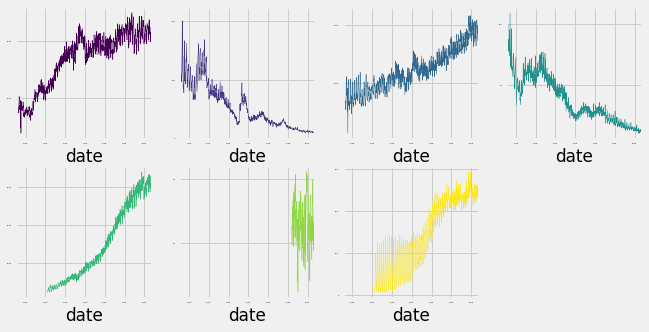

In [40]:
# Create a facetted graph with 2 rows and 4 columns
meat.plot(subplots=True, 
          layout= (2, 4), 
          sharex=False, 
          sharey=False, 
          colormap='viridis', 
          fontsize=2, 
          legend=False, 
          linewidth=0.5,
          figsize=(10, 5))

plt.show()

## Find relationships between multiple time series

### Correlations between two variables

* In the eld of Statistics, the correlation coefcient is a measure used to determine the strength or lack of relationship between two variables:
  * Pearson's coefcient can be used to compute the correlation coefcient between variables for which the relationship is thought to be linear
  * Kendall Tau or Spearman rank can be used to compute the correlation coefcient between variables for which the relationship is thought to be non-linear

### Compute correlations

In [60]:
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from scipy.stats.stats import kendalltau

x = [1, 2, 4, 7]
y = [1, 3, 4, 8]
pearsonr(x, y)

(0.9843091327750998, 0.015690867224900207)

In [61]:
spearmanr(x, y)

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [62]:
kendalltau(x, y)

KendalltauResult(correlation=1.0, pvalue=0.08333333333333333)

### Whatis a correlation matrix?

* When computing the correlation coefcient between more than two variables, you obtain a correlation matrix 
  * Range: [-1, 1]
  * 0: no relationship
  * 1: strong positive relationship
  * -1: strong negative relationship
  * A correlation matrix is always "symmetric"
  * he diagonal values will always be equalto 1
  
```python
x y z
x 1.00 -0.46 0.49
y -0.46 1.00 -0.61
z 0.49 -0.61 1.00
```

### Compute correlations between time series

Koefisien korelasi dapat digunakan untuk menentukan bagaimana beberapa variabel (atau sekelompok time series) dikaitkan satu sama lain. Hasilnya adalah matriks korelasi yang menggambarkan korelasi antara time series. Perhatikan bahwa nilai-nilai diagonal dalam matriks korelasi akan selalu `1`, karena time series akan selalu berkorelasi sempurna dengan dirinya sendiri.

Koefisien korelasi dapat dihitung dengan metode pearson, kendall dan spearman. Diskusi penuh dari berbagai metode ini berada di luar ruang lingkup kursus ini, tetapi metode pearson harus digunakan ketika hubungan antara variabel Anda dianggap linier, sedangkan metode kendall dan spearman harus digunakan ketika hubungan antara variabel Anda dianggap menjadi non-linear.

In [42]:
# Print the correlation matrix between the beef and pork columns using the spearman method
print(meat[['beef', 'pork']].corr(method='spearman'))

# Print the correlation between beef and pork columns
print(0.827587)

          beef      pork
beef  1.000000  0.827587
pork  0.827587  1.000000
0.827587


In [41]:
# Compute the correlation between the pork, veal and turkey columns using the pearson method
print(meat[['pork', 'veal', 'turkey']].corr(method='pearson'))

# Print the correlation between veal and pork columns
print(-0.808834)

# Print the correlation between veal and turkey columns
print(-0.768366)

# Print the correlation between pork and turkey columns
print(0.835215)

            pork      veal    turkey
pork    1.000000 -0.808834  0.835215
veal   -0.808834  1.000000 -0.768366
turkey  0.835215 -0.768366  1.000000
-0.808834
-0.768366
0.835215


### Visualize correlation matrices

Matriks korelasi yang dihasilkan dalam latihan sebelumnya dapat diplot menggunakan heatmap. Untuk melakukannya, Anda dapat memanfaatkan fungsi `heatmap()` dari library seaborn yang berisi beberapa argumen untuk menyesuaikan tampilan heatmap Anda.

```python
df_corr = df.corr()

sns.heatmap(df_corr)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
```

Anda dapat menggunakan metode `.xticks()` dan `.yticks()` untuk memutar label sumbu sehingga tidak tumpang tindih.

Untuk mempelajari tentang argumen ke fungsi `heatmap()`, lihat [halaman ini](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

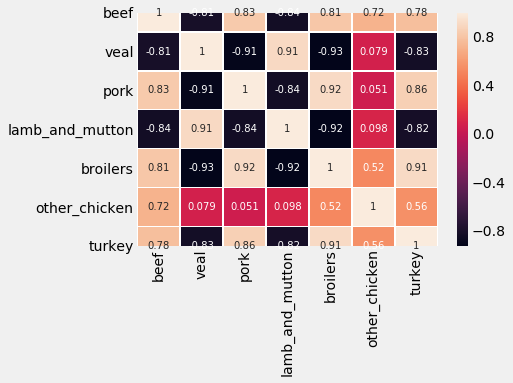

In [55]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame: corr_meat
corr_meat = meat.corr(method='spearman')


# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_meat,
            annot=True,
            linewidths=0.5,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

### Clustered heatmaps

Heatmaps sangat berguna untuk memvisualisasikan matriks korelasi, tetapi clustermaps lebih baik. Clustermap memungkinkan untuk mengungkap struktur dalam matriks korelasi dengan menghasilkan heatmap yang secara hierarkis terkelompok:

```python
df_corr = df.corr()

fig = sns.clustermap(df_corr)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
```

Untuk mencegah label sumbu yang tumpang tindih, Anda dapat mereferensikan `Axes` dari objek `fig` yang mendasari dan menentukan rotasi. Anda bisa belajar tentang argumen ke fungsi `clustermap()` [di sini](https://seaborn.pydata.org/generated/seaborn.clustermap.html).

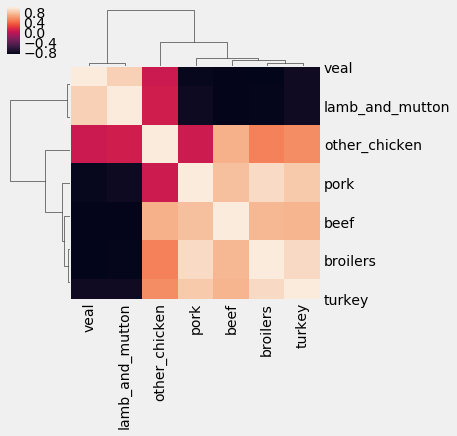

In [59]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr(method='pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_meat,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(5, 5))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()